## Final Project Submission

Please fill out:
* Student name: Steven Jasper
* Student pace: part time online
* Scheduled project review date/time: 
* Instructor name: Eli Thomas
* Blog post URL:

## Attributes/Features
1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

### related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
### other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

### social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric)

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)


## Problem Statement
_____
Our bank has provided data on previous telemarketing campaigns and wishes to improve the number of subscriptions. Our goal is to utilize predictive analysis to develop a model which will optimize our 'target' selection when running telemarketing campaigns for term-deposits. We also aim to provide firm, data-driven recommendations to the business for potential future targeted telemarketing campaigns.

## Methodology
___
We will be utilizing the OSEMN Process for building our model. This is described by 5 steps:

* Obtain
* Scrub
* Explore
* Model
* Interpret

## Domain Knowledge
___
A term deposit can be defined as a fixed-term investment that includes the deposit of money into an account at a financial institution. We want more customers to subscribe to our term deposit accounts because it give our business more certainty as to how much money is available for loans. Since term deposit accounts hold the money for a fixed amount of time at the cost of a higher interest rate, it prevents the contributor from withdrawing funds from the account for a fixed amount of time. 

## Business Value
___
Obtaining more subscribers to term-deposits means more revenue for our bank, and creating a sustainable pipeline for future campaigns will allow for increased revenue flow. We intend on utilizing predictive analysis to develop a model that can predict if a customer will invest in a term deposit with at least 80% accuracy.

## Data Cleaning/Preprocessing
__________
This phase will take our data and create a more clear understanding of what it means. We will also begin to clean up missing values, placeholders, and begin to make our data more optimal for our Machine Learning algorithm. First, we will begin to ensure our data is formatted correctly and begin to collect basic metrics for the cleanliness of our data. Then we will move into the preprocessing phase by normalizing our quantitative data and using one-hot encoding to better classify our categorical data.

### Libraries
___

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer, KNNImputer

from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import xgboost as xgb

from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, classification_report, plot_confusion_matrix

from sklearn.metrics import make_scorer, precision_recall_curve

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

import time

random_state = 343

## Import and Scrub Data
___

In [2]:
# Your code here - remember to use markdown cells for comments as well!

raw_df = pd.read_csv('bank-additional-full.csv', delimiter=';')

raw_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Train-Test Split
___
We will be splitting our original data into a 75/25 ratio of a train set and a test set repsectively. This is to prevent any data snooping bias while processing our training data. Once we finish processing and training our models on the training set, we will run our test data through identical processing steps and eventually use our chosen modeling method to validate our model further.

In [3]:
train_set, test_set = train_test_split(raw_df, test_size=.25, stratify=raw_df['y'], random_state = 343)
print(train_set.shape)
print(test_set.shape)

(30891, 21)
(10297, 21)


In [4]:
df = train_set.reset_index(drop=True).copy()

In [5]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

As seen above we do not really have any NaN values in our dataset, which is great. However, we want to take a deeper look into the descriptive stats of each column to see if there is anything strange going on.

In [6]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,30891.000000,30891.000000,30891.000000,30891.000000,30891.000000,30891.000000,30891.000000,30891.000000,30891.000000,30891.000000
mean,39.995436,257.973876,2.575087,962.134538,0.173675,0.088378,93.576815,-40.502107,3.626721,5167.206513
std,10.391019,260.135450,2.792051,187.736280,0.493835,1.566406,0.576417,4.623054,1.731949,72.284058
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,179.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,318.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Taking a look accross our different numerical columns, the only real 'strange' behavior we have is in our raw_df.pdays column. The entire distribution seems to be 999, well if we take a look at the column dictionary above, we can see that pdays has a placeholder value of 999. Let see if we can determine the proportion of placeholders to actual data, this will help us decide if it is worth keeping the column as a feature all together.

In [7]:
df.pdays.value_counts()

999    29744
3        326
6        325
4         79
7         49
12        45
10        45
2         42
9         41
5         29
13        27
11        24
1         21
15        17
14        17
8         14
0         12
16        11
17         7
18         5
19         3
21         2
22         2
20         1
25         1
26         1
27         1
Name: pdays, dtype: int64

We can see that a vast majority of the data in this column is placeholder data. With no way to replace this data in a way that makes sense, and won't dirty our data, we are going to drop this column.

We also see within our data dictionary that the duration column is only included for the sole purpose of benchmarking and should be discarded if we are intending to have a realistic predictive model. We will drop this column as well.

Next we are going to check our data types and validate that they are in a proper form for our machine to understand.

In [8]:
df.drop(columns = ['pdays','duration'], inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30891 entries, 0 to 30890
Data columns (total 19 columns):
age               30891 non-null int64
job               30891 non-null object
marital           30891 non-null object
education         30891 non-null object
default           30891 non-null object
housing           30891 non-null object
loan              30891 non-null object
contact           30891 non-null object
month             30891 non-null object
day_of_week       30891 non-null object
campaign          30891 non-null int64
previous          30891 non-null int64
poutcome          30891 non-null object
emp.var.rate      30891 non-null float64
cons.price.idx    30891 non-null float64
cons.conf.idx     30891 non-null float64
euribor3m         30891 non-null float64
nr.employed       30891 non-null float64
y                 30891 non-null object
dtypes: float64(5), int64(3), object(11)
memory usage: 4.5+ MB


These data types seem to be in line with what we expect prior to modeling, now that we have scrubbed the data a good amount, we will move towards testing our numeric columns for multicolinearity as well as taking a look at our categorical data to determine any shortcomings of our data.

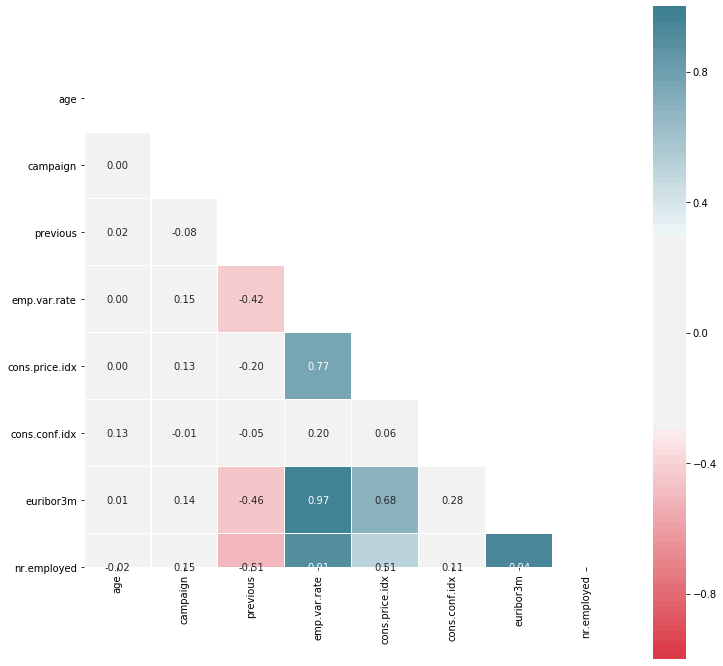

In [9]:
plt.figure(figsize= (12,12))

corr = df.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, center = 0, vmin = -1, vmax = 1, square=True, linewidths=.5, annot = True, fmt='.2f' ,cmap=sns.diverging_palette(10,220,sep = 80, n = 100))

We can see that there area number of features that have high correleation with eachother, this will lead to the issue of multicolliniarity within our model. However, multicollinearity should not be too much of an issue as we are not using methods such as a Naive Bayes algorithm. The methods we will be using do not assume an inherit independence between our features.
___

Next we will take a look at our categorical data and search for any inconsistencies, such as unknown data and other placeholders. We can find our categorical data by taking a look at our data types we discovered above.

In [10]:
categoricals = df.select_dtypes(include=object).columns

for col in categoricals:
    print("Feature: {}\n{} \n".format(col, df[col].value_counts(normalize=True)))

Feature: job
admin.           0.254022
blue-collar      0.223819
technician       0.164676
services         0.095173
management       0.070894
retired          0.041468
entrepreneur     0.035641
self-employed    0.034897
housemaid        0.025218
unemployed       0.024829
student          0.021624
unknown          0.007737
Name: job, dtype: float64 

Feature: marital
married     0.606228
single      0.279887
divorced    0.112233
unknown     0.001651
Name: marital, dtype: float64 

Feature: education
university.degree      0.296850
high.school            0.231200
basic.9y               0.146807
professional.course    0.128711
basic.4y               0.100903
basic.6y               0.054579
unknown                0.040530
illiterate             0.000421
Name: education, dtype: float64 

Feature: default
no         0.790975
unknown    0.208961
yes        0.000065
Name: default, dtype: float64 

Feature: housing
yes        0.525460
no         0.449678
unknown    0.024862
Name: housing, dtyp

Here we will walk through each feature that seems to have a placeholder value and discuss unknown data and how we may handle it.

###### job

This feature shows us what career each individual is. The data is generally spread, there is clearly more dominant traits, however it is not to the point where it is concerning. For the unknown values, this will be filled utlizing distance based imputation via K-nearest neighbors (KNN) imputation.

###### marital

The marital status of individuals seems to be dominated by married, however this is understandable and can remain without issue. We do have an unknown value that is about .002\% of our data. There are a few options here, we can either impute the data somehow, or simply get rid of those values. It would not necessarily be detrimental to drop such  a small amount of data, however we can just simply replace these values with the mode (married) as it is such a large portion of the set.

###### education

Education is generally the same as the job column, we can either get rid of the unknowns, or keep them and impute them. If we were to get rid of the unknowns we would be getting rid of 4\% of our data, which we may not want to do. We will treat this column the same as job and utilize KNN inputation to fill our missing values.

###### default

The default columns describes whether the customer has a credit in default. We see that there is an overwhelmingly small amount of 'yes' entries, so it would be safe to fill our missing data with the mode (no) which is almost 80\%.

###### housing

This column determines whether our customer currently has a housing loan or not, we can see that the data is spread generally even with a majority of entries as 'yes'. We can see that a very small amount (roughly 2\%) of entries are unknown. Here we can also utilize KNN imputation to fill these values.

###### loan

The loan column is our last categorical value that has a placeholder. This feature has a large majority of the data in the 'no' category, meaning that a majority of the customers does not currently have a loan taken out. Here we can go ahead and fill our 'unknown' data with the mode for this columns.

We will make the 'Mode' changes below, and we will implement the KNN imputation later on.

In [11]:
cols = ['marital', 'default', 'loan']

for col in cols:
    df[col]  = df[col].replace('unknown', None)
    df[col] = df[col].fillna(df[col].mode())

In [12]:
for col in cols:
    print(df[col].value_counts(), '\n')

married     18755
single       8656
divorced     3480
Name: marital, dtype: int64 

no     30889
yes        2
Name: default, dtype: int64 

no     26092
yes     4799
Name: loan, dtype: int64 



###### Duplicate Check
___
Next we will begin to take a look in our data to see if there are any duplicate entries. If we do find duplicates, we will remove these entries as to not violate our data.

In [13]:
df[df.duplicated()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1072,34,blue-collar,single,basic.9y,no,yes,no,cellular,jul,thu,1,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no
1135,57,blue-collar,married,basic.9y,no,yes,no,cellular,aug,mon,2,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
1621,34,admin.,single,university.degree,no,yes,no,cellular,aug,mon,3,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
1771,30,admin.,single,university.degree,no,no,no,cellular,aug,mon,2,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
1845,56,retired,married,basic.4y,no,yes,no,cellular,aug,wed,1,0,nonexistent,1.4,93.444,-36.1,4.967,5228.1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30857,30,admin.,single,high.school,no,yes,no,cellular,may,mon,1,0,nonexistent,-1.8,92.893,-46.2,1.244,5099.1,no
30859,38,management,married,university.degree,no,no,no,cellular,aug,wed,1,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
30862,42,admin.,single,university.degree,no,no,no,cellular,aug,wed,1,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,no
30864,36,blue-collar,married,basic.9y,no,yes,no,cellular,jul,thu,1,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no


Since there is a large amount of duplicates here we will go ahead and drop any duplicated data while maintaining a copy of each. We will determine how much overall data was lost by checking the shape before and after the change.

In [14]:
before = df.shape
print(before)

(30891, 19)


In [15]:
df.drop_duplicates(keep = 'first', inplace = True)

In [16]:
after = df.shape
print(after)

(29718, 19)


In [17]:
print('After this chage we have only sacrificed {}% of our data.'.format(round((1-(after[0]/before[0]))*100,3)))

After this chage we have only sacrificed 3.797% of our data.


Only losing a small percentage of our data certainly seems like a good investment when we are not allow duplicate values to skew our data. Ideally this data would include unique identifiers to more easily determine duplicate values, however this was not done prior to collection.
___
We will now take a look at some of the names for our categorical values, we will replace special characters and periods with _ symbol.
We see that in the job column the 'admin.' entry looks a bit off, we are going to shorten that by removing the . Also, in the column names they also have a '.' which is separating the words. We see this in the education columns as well.

In [18]:
# replace all columns with '.' with _
df.columns = df.columns.str.replace('.', '_')
# replace entries in the job and education columns with '_' instead of '.'
df['education'] = df['education'].str.replace('.', '_')
df['job'] = df['job'].str.replace('.', '_')

### Exploratory Data Analysis
---
Now that our data is clean we will begin to do a bit of exploration of our data and see if we can find any insight at the top level of our data. The goal is to come up with 3 business recommendations and a total of 5 visualizations that provide more insight into our data.


First lets just take a look at the spread of our 'yes' and 'no' data, how many people within our data actually subscribed?

Text(0.5, 1.0, 'Subscriptions')

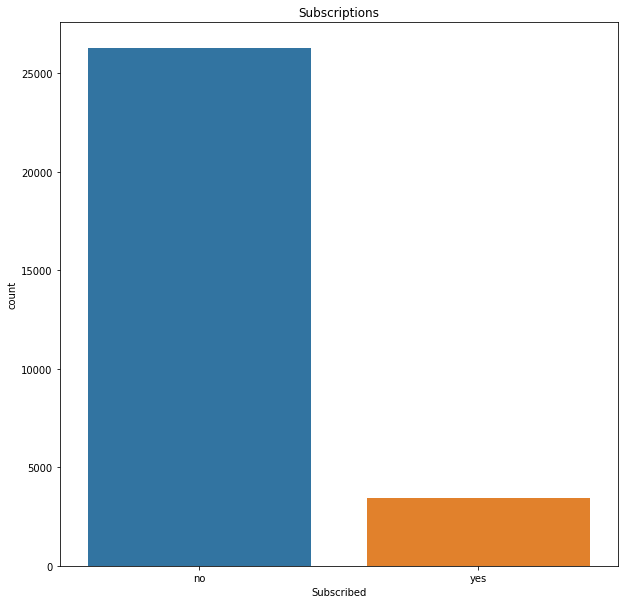

In [19]:
plt.figure(figsize=(10,10))
sns.countplot(df['y'])
plt.xlabel('Subscribed')
plt.title('Subscriptions')


This shows that it is pretty obvious a majority of customers do not subscribe to our term deposits. There is severe class imbalance within the set. Lets take a look at this data when it is normalized.
___


In [20]:
df['y'].value_counts(normalize=True)

no     0.883976
yes    0.116024
Name: y, dtype: float64

Only about 12% of our individuals subscribed to term deposits, this clearly exposes massive class imbalance in the data. We will account for this class imbalance by utilizing SMOTE vs. a general bootstrap duplication technique later when we move to preparing our data for modeling.

Let's take a look at all of our continuous data to get a better idea of how this data is represented.

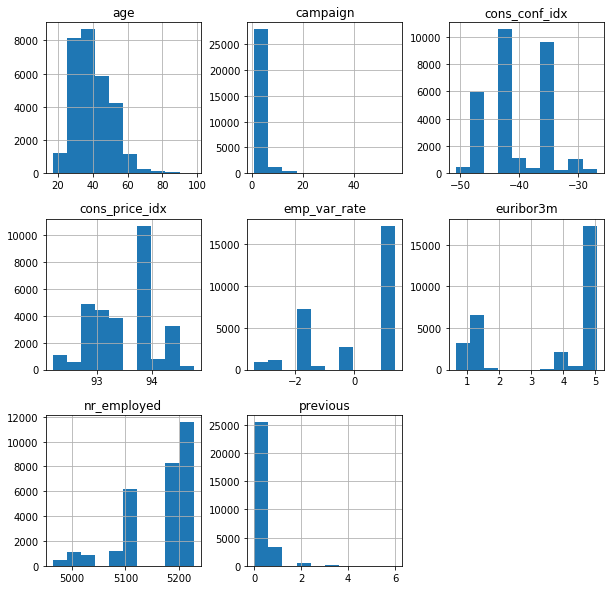

In [21]:
df.hist(figsize=(10,10))
plt.show()

Now lets take a look at some categorical data. Let's see how the marital status determines whether an individual will subscribe to a term deposit.

Text(0.5, 1.0, 'Marital Status vs. Subscription Status')

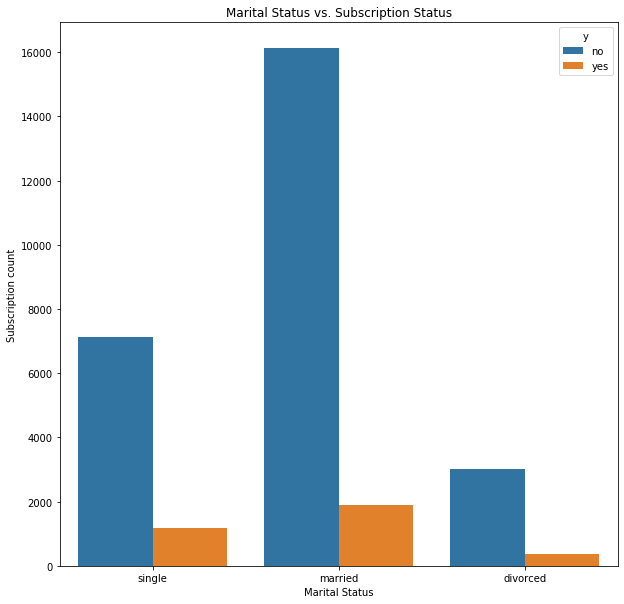

In [22]:
plt.figure(figsize=(10,10))
sns.countplot(x = df['marital'], hue = df['y'])
plt.xlabel('Marital Status')
plt.ylabel('Subscription count')
plt.title('Marital Status vs. Subscription Status')

Let's see if we can apply the same concept above to all of our categorical data.

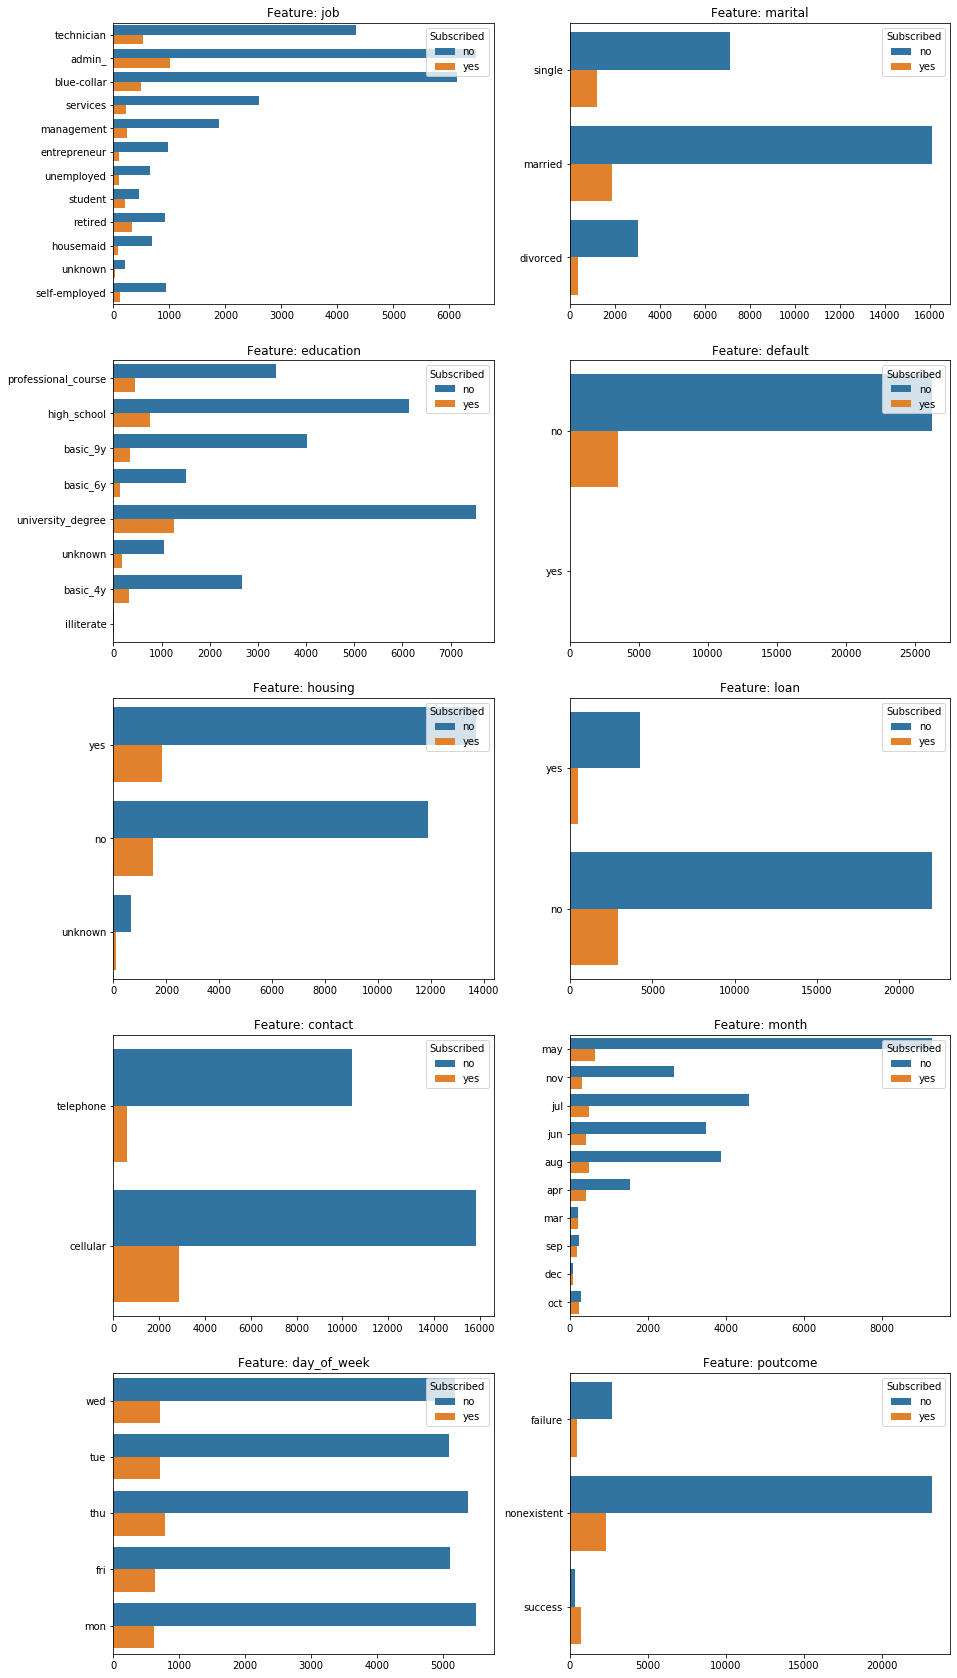

In [23]:
# grabs all categorical features from above while removing our y feature
cat_cols = list(categoricals[:-1])

fig, axes = plt.subplots(5,2, figsize=(15,30))
for ind, cat in enumerate(cat_cols):
    ax_x = ind // 2
    ax_y = ind % 2
    # plot horizontal bar plot, horizontal due to the number of value on x axis
    sns.countplot(y=df[cat],orient='h', hue=df['y'],ax = axes[ax_x,ax_y])
    
    axes[ax_x, ax_y].set_title('Feature: {}'.format(cat))
    axes[ax_x, ax_y].set_xlabel(None)
    axes[ax_x, ax_y].set_ylabel(None)
    axes[ax_x, ax_y].legend(title='Subscribed', loc='upper right')
plt.show()
    

Here we see more edvidence of class imbalance, it is difficult to tell what values actually contribute to the subscription outcome.

Let's visualize this slightly different, starting with our marital feature again. Here we will do a horizontal bar, but this time it will be stacked. First, we need to do some minor data manipulation in order to graph this properly.

In [24]:
# group by both marital and y to get full sub counts for each
counts = df[['marital','y']].groupby(['marital', 'y']).size().unstack()
counts

y,no,yes
marital,,
divorced,3020,368
married,16126,1890
single,7124,1190


In [25]:
# sum the counts to obtain a total marital counts
marital_counts = counts.sum(axis='columns')
marital_counts

marital
divorced     3388
married     18016
single       8314
dtype: int64

In [26]:
# use total counts and sub counts for each to determine proportions for each respective marital status
marital_propor = counts.div(marital_counts, axis='index')
marital_propor

y,no,yes
marital,,
divorced,0.891381,0.108619
married,0.895093,0.104907
single,0.856868,0.143132


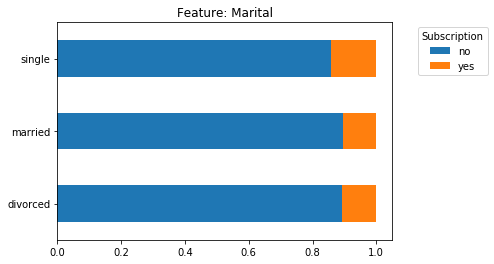

In [27]:
# plot proportions on a horizontal bar graph
marital_propor.plot.barh(stacked=True)

plt.legend(loc='upper right', bbox_to_anchor = (1.3, 1), title = ('Subscription'))
plt.title('Feature: Marital')
plt.ylabel(None)
plt.show()

Above it becomes much more clear which category has a higher chance of producing a subscription. However small the difference may be, it gives us insight that single individuals seem to subscribe more to term deposits.
___

Now lets apply this to all of our categorical data. We will create a function that will go through each category and plot a similar graph as above.

In [28]:
def barh_prop_graph(feature, df, target, ax = None):
    '''
    This function will group our data by the selected feature and process proportions to graph a stacked bar graph
    Args: 
        features: name of a feature we wish to graph
        df: dataframe name
        target: target variable
        ax: axes, default is None
    Returns:
        None
    '''
    counts = df[[feature, target]].groupby([feature,target]).size().unstack()
    feat_counts = counts.sum(axis='columns')
    feat_props = counts.div(feat_counts, axis='index')
    
    feat_props.plot.barh(stacked=True, ax = ax)
    if ax == None:
        plt.legend(loc='upper right', bbox_to_anchor = (1.3, 1), title = ('Subscription'))
        plt.title('Feature: {}'.format(feature))
        plt.ylabel(None)
        plt.show()
    else:
        ax.set_title('Feature {}'.format(feature))
        ax.set_label(None)
    return None

Now that we have a reusable function to graph our data in the desired format, we will move forward with implementing this on all of our categorical features.

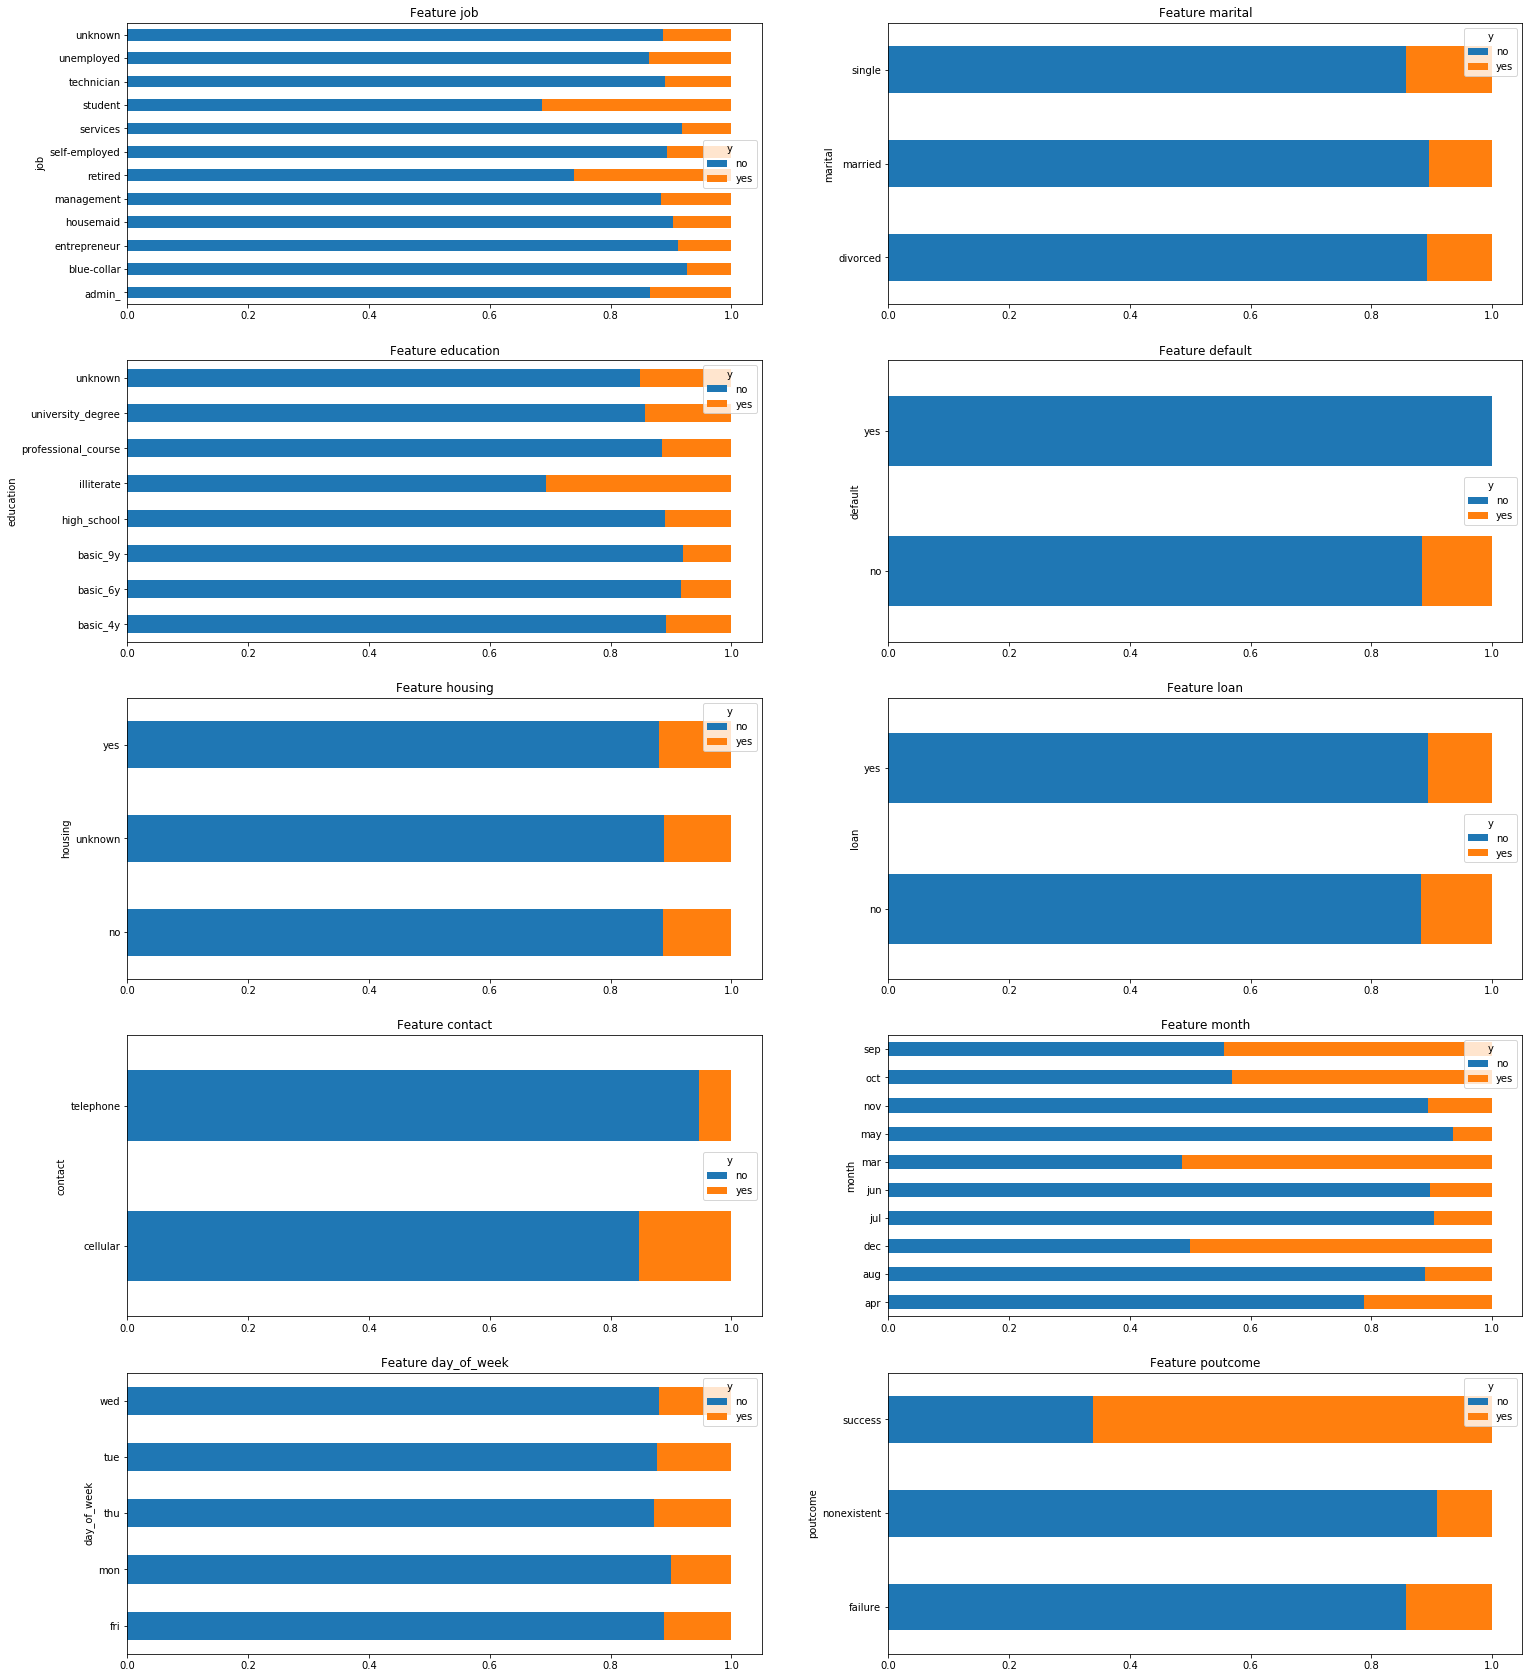

In [29]:
fig, axes = plt.subplots(5,2, figsize=(25,30))

for ind, col in enumerate(cat_cols):
    ax_x = ind // 2
    ax_y = ind % 2
    barh_prop_graph(col, df, 'y', ax=axes[ax_x,ax_y])
plt.show()

These visualizations show a number of pretty surprising results. 

A strong indicator seems to be the **poutcome** feature. **Individuals who had previously subscribed to a term deposit seem likely to subscribe to another.** This will tie into one of our **business recomendations**. Our recommendation will be to try and target individuals who have subscribed in previous campaigns.

We can also see that the **job** feature shows us that Students and those who are retired are also more likely to subscribe to our term deposit. 

The **education** feature shows that a higher proportion of illiterate individuals elected to subscribe to our term deposits. This is an interesting point, could it be that less-educated individuals are at higher risk for predatory marketing? This could become a question of ethics when taking this into account for training our data. For the sake of this analysis we will leave it be, however it is important to recognize the potential for a targeting bias towards uneducated and taking advantage of this.
____
Let's take a deeper dive into some of these features specifically, and see if we can expand on the observations above.

First, we are going to take a look at the proportion of retired individuals, which are also classified as illiterate, subscribed to our term deposit.

In [30]:
retired_illiterate = df[(df['job'] == 'retired') & (df['education'] == 'illiterate')]
print(len(retired_illiterate))
retired_illiterate_subscribed = retired_illiterate[(df['y'] == 'yes')]
retired_illiterate_subscribed.head()

3


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
4701,80,retired,married,illiterate,no,yes,yes,cellular,aug,tue,1,1,success,-2.9,92.201,-31.4,0.883,5076.2,yes
24675,42,retired,divorced,illiterate,no,no,no,telephone,aug,wed,3,0,nonexistent,-2.9,92.201,-31.4,0.834,5076.2,yes


So above we can see that despite the fact that 67\% of our data technically supports the idea that individuals who are retired are more likely to subscribe to our term deposits, there is nowhere close to enough data to support this claim. We can simply discount this claim for the time being until there is more data, however it seems very unlikely.

___
Next we will take a look at a subset of our data where the individuals previously subscribed to our term deposit. We want to find out if there is any deeper insight we can find from these individuals.

We will first take a look at the data for these individuals as a whole, then we will take a look to see if there is any additional assumptions that can be made.

In [31]:
pout_success = df[(df['poutcome'] == 'success')]
len(pout_success)

1032

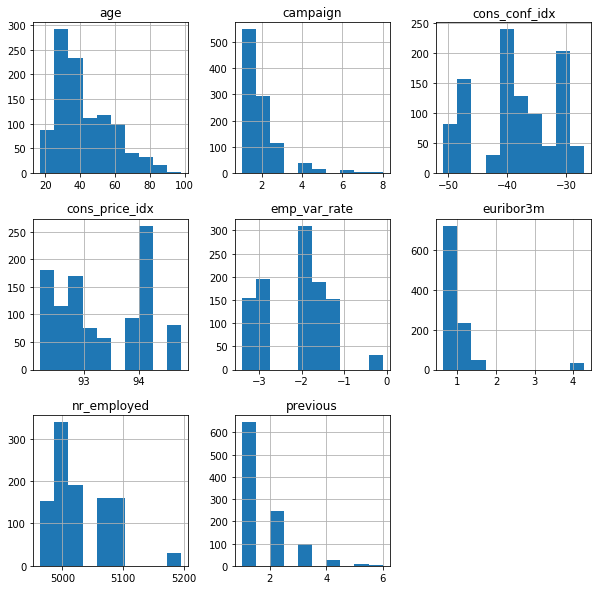

In [32]:
pout_success.hist(figsize=(10,10))
plt.show()

There is not much here to gather, outside of some obvious value skewness. For example, we can see that it looks like the age 30-40 range is overly represented in successful subscriptions of individuals who has subscribed before. However I believe it is safe to say that a good **recommendation** would be to steer towards individuals who have subscribed in the past, as 65% of these individuals resubscribed.

Next we will take a look at the month the customers were called. Can we find an optimal time to contact individuals? Let's find out what the data suggests.

In [33]:
dfGB = df[['month', 'day_of_week', 'y']].groupby(['month', 'day_of_week', 'y']).size().unstack()
dfGB

y                    no  yes
month day_of_week           
apr   fri           402   50
      mon           455   57
      thu           395  186
      tue           123   62
      wed           165   62
aug   fri           675   93
      mon           812   74
      thu           846   97
      tue           802  116
      wed           752  108
dec   fri            13    7
      mon            21   14
      thu            14   16
      tue             6   13
      wed            11   15
jul   fri           651   87
      mon           989   93
      thu          1062  109
      tue           970   99
      wed           933  102
jun   fri           788   61
      mon           798   95
      thu           630   66
      tue           632   93
      wed           632   88
mar   fri            35   35
      mon            58   44
      thu            38   34
      tue            44   61
      wed            22   34
may   fri          1940  157
      mon          1773  139
      thu          1720  115
      tue          1883  107
      wed          1986  130
nov   fri           497   65
      mon           480   50
      thu           572   72
      tue           532   64
      wed           584   67
oct   fri            52   47
      mon            67   26
      thu            65   52
      tue            56   47
      wed            51   49
sep   fri            56   35
      mon            45   16
      thu            44   41
      tue            47   48
      wed            46   50

In [42]:
import plotly.express as px
df['y_num'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)
dfTemp = df[(df['y_num'] == 1)]
fig = px.treemap(dfTemp,
                path = ['month','day_of_week'],
                values= 'y_num')
fig.show()

The above graphic demonstrates what month/day_of_week combination provides the highest number of subscriptions. Based off this top level analysis we can develop the **recommendation** to increase the volume of calls that are made during May on Fridays. 

You may notice that this graphic does not take into account class imbalance as we saw this feature included in our above analysis. Since our problem statement does not directly limit the volume of calls we can make optimization does not necessarily need to be at the forefront. This falls into the **future work** category, as I would like to take a deeper statistical dive into this feature to validate that this is a statistically significant observation.

___
### Feature Engineering
Next, we will begin to process our data for modeling. 